In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn.svm import SVC
%matplotlib inline
import itertools
import seaborn as sns
from sklearn import metrics
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score


In [2]:
#load Dataset 
df = pd.read_csv("audit_data/audit_risk.csv")
df.shape

(776, 27)

In [3]:
df.head(5)


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
df.tail(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0
775,55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.464,0.4,0.5,0.2928,0


In [5]:
##Describing the Data

df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [6]:
print(df.count())

Sector_score      776
LOCATION_ID       776
PARA_A            776
Score_A           776
Risk_A            776
PARA_B            776
Score_B           776
Risk_B            776
TOTAL             776
numbers           776
Score_B.1         776
Risk_C            776
Money_Value       774
Score_MV          776
Risk_D            776
District_Loss     776
PROB              776
RiSk_E            776
History           776
Prob              776
Risk_F            776
Score             776
Inherent_Risk     776
CONTROL_RISK      776
Detection_Risk    776
Audit_Risk        776
Risk              776
dtype: int64


In [7]:
#checking the datatype
print (df.dtypes)

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


LOCATION_ID is type object type, it should be numerical value to help in the prediction

In [8]:
# Checking Missing values or null entries in the dataset
print (df.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       2
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


In [9]:
print(df['LOCATION_ID'].unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


In [10]:
#The below code has been used to replace the categorical values to null values 
cnt = 0
for row in df['LOCATION_ID']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc[cnt,'LOCATION_ID']=np.nan
    cnt+=1

In [11]:
print (df['LOCATION_ID'].unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' nan '43' '44' '17']


In [12]:
print (df.isnull().sum())

Sector_score      0
LOCATION_ID       3
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       2
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


In [13]:
#Null values are replced with the mean value, instead of throwing them away. 

df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)







df['LOCATION_ID'].fillna((df['LOCATION_ID'].median()), inplace=True)

In [14]:
#Checking if there are any null values  

print(df['Money_Value'].isnull().sum())
print(df['LOCATION_ID'].isnull().sum())


0
0


In [15]:
df.isnull().sum().sort_values().sort_values(ascending=False)

Risk              0
Audit_Risk        0
Detection_Risk    0
CONTROL_RISK      0
Inherent_Risk     0
Score             0
Risk_F            0
Prob              0
History           0
RiSk_E            0
PROB              0
District_Loss     0
Risk_D            0
Score_MV          0
Money_Value       0
Risk_C            0
Score_B.1         0
numbers           0
TOTAL             0
Risk_B            0
Score_B           0
PARA_B            0
Risk_A            0
Score_A           0
PARA_A            0
LOCATION_ID       0
Sector_score      0
dtype: int64

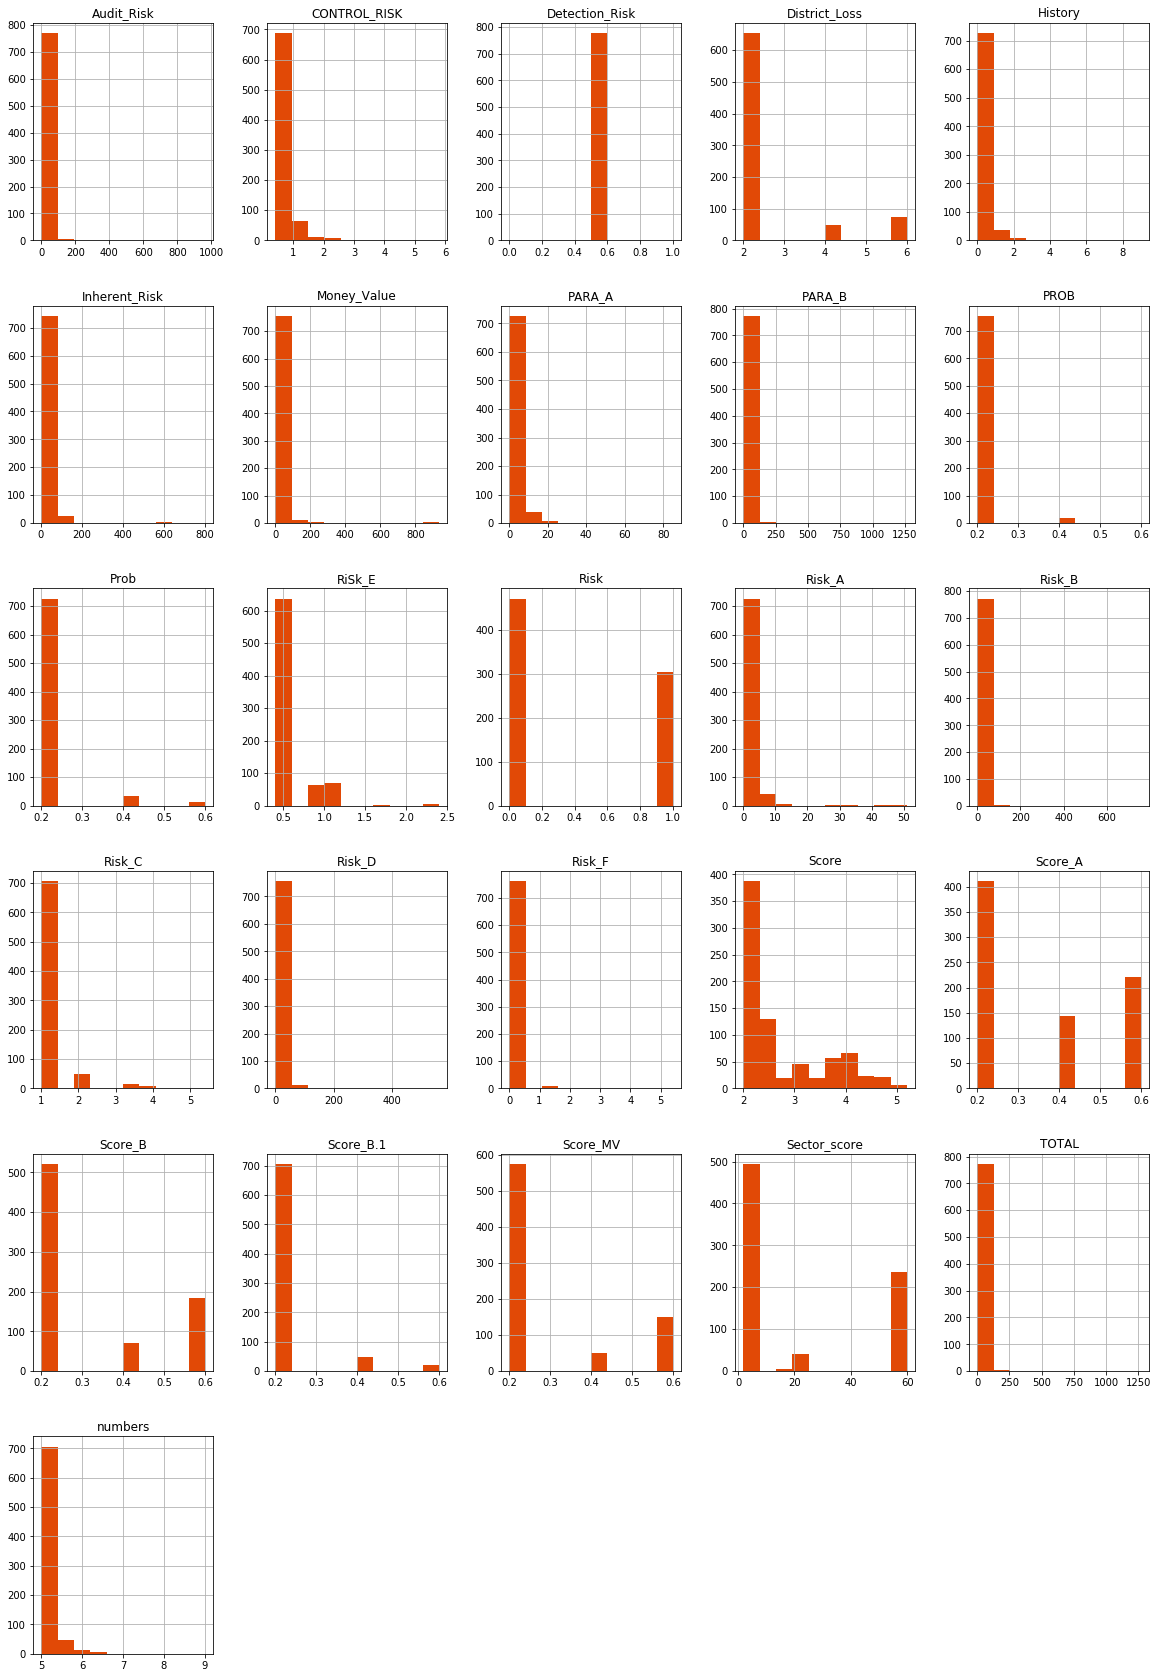

In [16]:
#Each Graph shows statistical analysis and data exploration 
#Cleary is seen the correlation between the variables

df.hist(bins=10, figsize=(20,30), color='#E14906')
plt.show()

In [17]:
#Location_ID is also dropped as it does not help in the prediction 
df = df.drop(['LOCATION_ID'], axis=1)
df.shape

(776, 26)

In [18]:
#Total column has been decided to be droped as it only adds the data from PARA_A, PARA_B and it will not 
df = df.drop(['TOTAL'], axis=1)
df.shape

(776, 25)

# Correlation Matix 

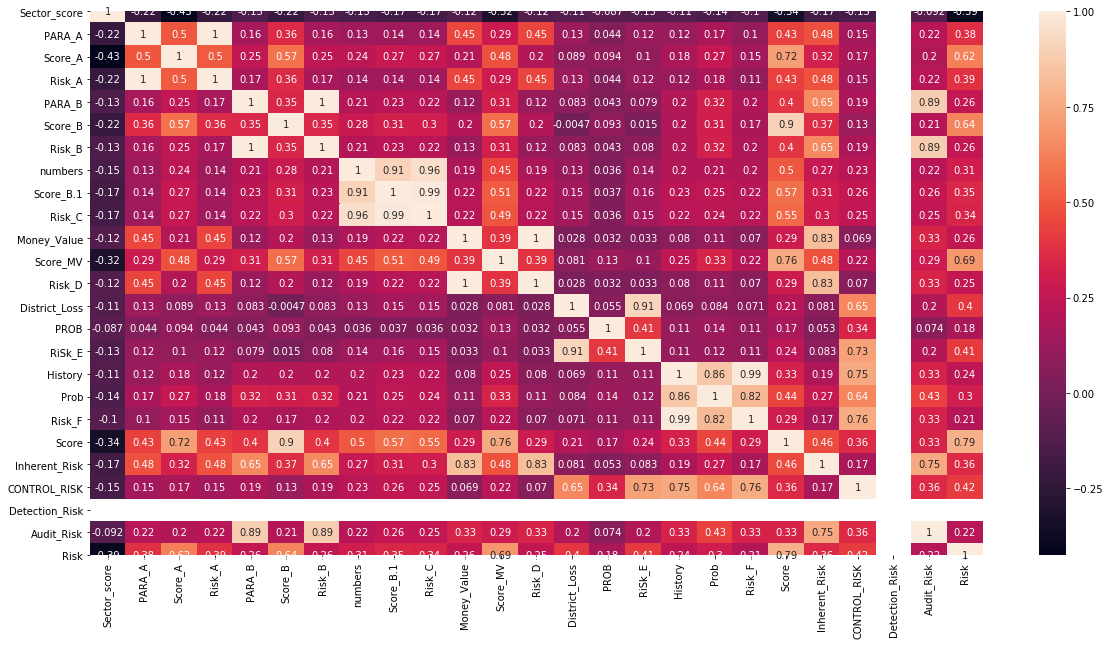

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [20]:
# There is no correlation of Detection_Risk, not helping in the prediction process therefore it will be deleted.
df=df.drop(['Detection_Risk'], axis=1)
df.shape

(776, 24)

# 

In [21]:
df.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk',
       'Risk'],
      dtype='object')

In [22]:
# Here I am separating the target variable in a different dataset 
x = df.drop(['Risk'],axis=1)
y = df['Risk']

# Spliting data into 60% train and 20% test data 

In [23]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

# Splitting test data into 20% validation data and 20% test data

In [24]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [25]:
# Check proportion of percentages 
print ('Rows + Columns of Training data',x_train.shape)
print ('Rows + Columns of Validation Data',x_val.shape)
print ('Rows + Columns of Testing Data',x_test.shape)

Rows + Columns of Training data (465, 23)
Rows + Columns of Validation Data (155, 23)
Rows + Columns of Testing Data (156, 23)


# SVM Model Building 

In [55]:
f1 = SVC()
f1.fit(x_train,y_train)

C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
ypredicted = f1.predict(x_val)
print ("accuracy:", metrics.accuracy_score(y_val,ypredicted))

accuracy: 0.9870967741935484


# Testing 

# Cross validation 

In [28]:
k = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)
scoring = 'accuracy'

cross_val = cross_val_score(estimator = f1, X = x_train, y = y_train, cv = k, scoring=scoring)
cross_val.mean()

C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.980804810360777

# Evaluation of the model

In [29]:
y_predicted = f1.predict(x_val)
accuracy = accuracy_score(y_val, y_predicted)
precision = precision_score(y_val, y_predicted)
recall = recall_score(y_val, y_predicted)


out = pd.DataFrame([['SVM', accuracy, cross_val.mean(), precision, recall]], columns = 
                   ['Model', 'Accuracy','Cross Validation Accuracy', 'Precision', 'Recall'])

out

,Model,Accuracy,Cross Validation Accuracy,Precision,Recall
0,SVM,0.987097,0.980805,0.984127,0.984127


# Confusion Matrix 

In [ ]:
conf_matrix = confusion_matrix(y_test, y_testing_prediction)
plt.title('Confusion matrix of SVM')
sns.heatmap(conf_matrix,annot=True,fmt="d")
plt.show()

# Discussion 

## Test 2: 

In [51]:
f2 = SVC(kernel='linear')
f2.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
ypredicted2 = f2.predict(x_val)
print ("accuracy:", metrics.accuracy_score(y_val,ypredicted2))

accuracy: 0.9935483870967742


### Cross validation

In [43]:
k = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)
scoring = 'accuracy'

cross_val2 = cross_val_score(estimator = f2, X = x_train, y = y_train, cv = k, scoring=scoring)
cross_val2.mean()

0.9935707678075856

### Model Accuracy 

In [46]:
f2 = SVC()
f2.fit(x_train,y_train)
y_testing_prediction2 = f2.predict(x_test)
print ("Accuracy Score:", metrics.accuracy_score(y_test,y_testing_prediction2))

Accuracy Score: 0.9807692307692307


C:\Users\cvrin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation of the model

In [54]:
y_predicted2 = f2.predict(x_val)
accuracy2 = accuracy_score(y_val, y_predicted2)
precision2 = precision_score(y_val, y_predicted2)
recall2 = recall_score(y_val, y_predicted2)


out = pd.DataFrame([['SVM', accuracy2, cross_val2.mean(), precision2, recall2]], columns = 
                   ['Model', 'Accuracy','Cross Validation Accuracy', 'Precision', 'Recall'])

out

,Model,Accuracy,Cross Validation Accuracy,Precision,Recall
0,SVM,0.993548,0.993571,1.0,0.984127
